In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('Student_Performance.csv')

Кодирование категориального признака:

In [ ]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].map(dict(Yes=1, No=0))
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


Визуализация статистики:

In [ ]:
statistics_summary = df.describe()
statistics_summary

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


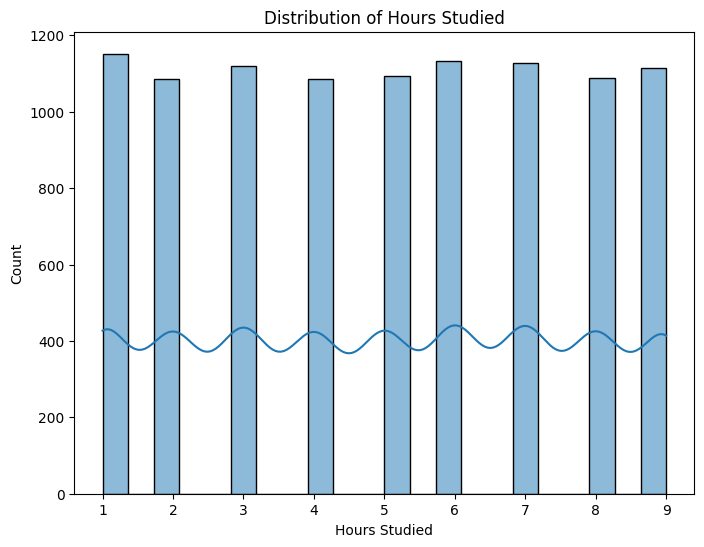

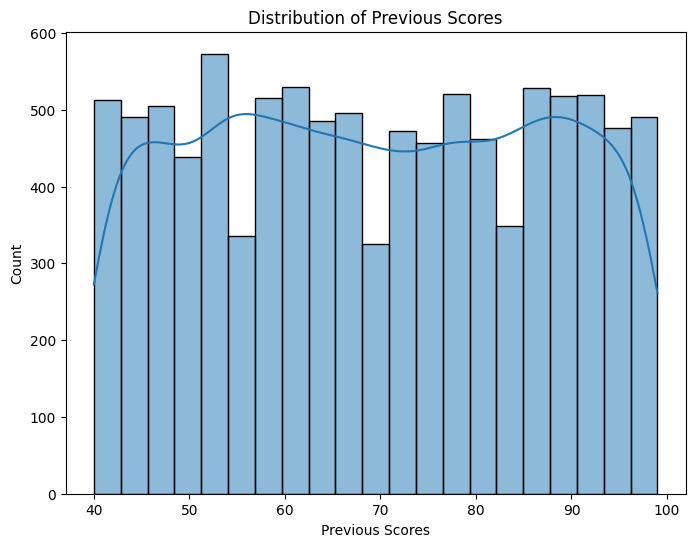

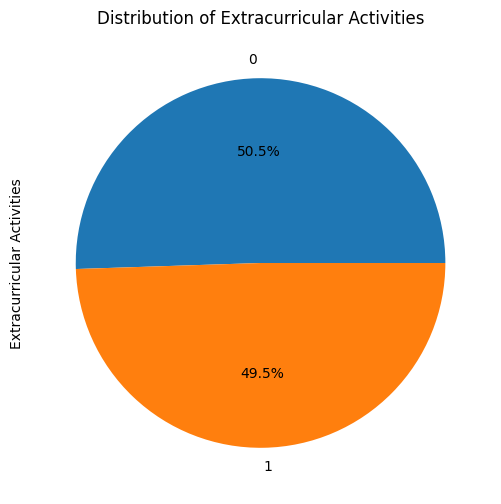

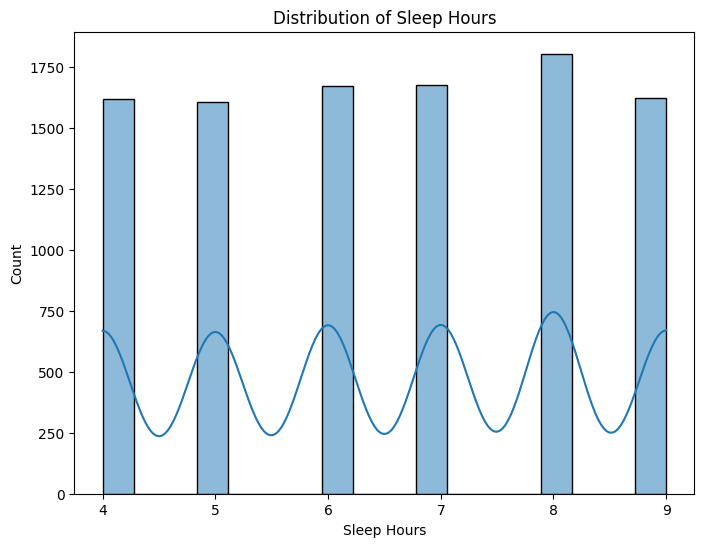

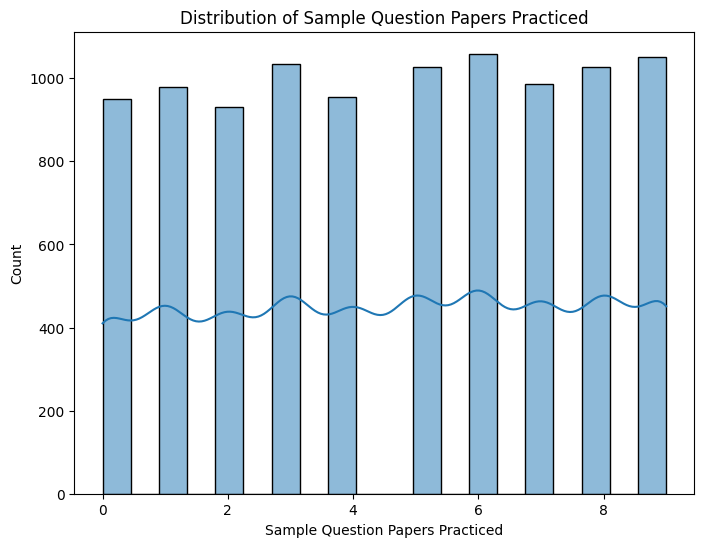

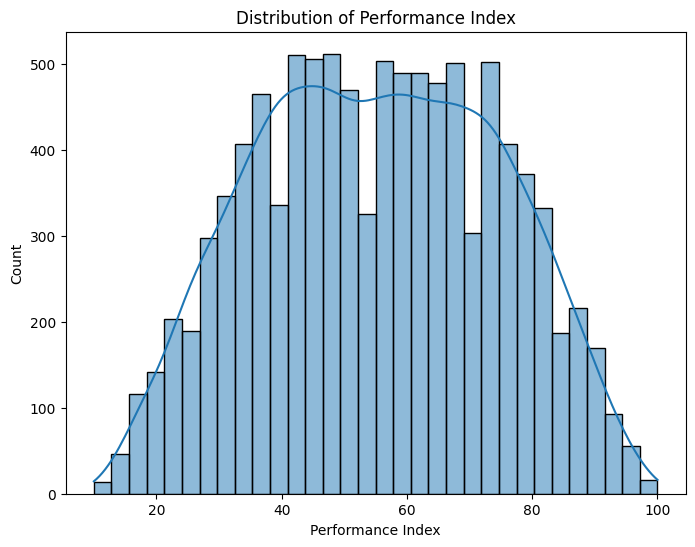

In [ ]:
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 6))

    if column != "Extracurricular Activities":
      sns.histplot(df[column], kde=True)

    else:
      df[column].value_counts(dropna=False).plot(kind="pie", autopct='%1.1f%%')

    plt.title(f'Distribution of {column}')
    plt.show()

Визуализируем корреляцию

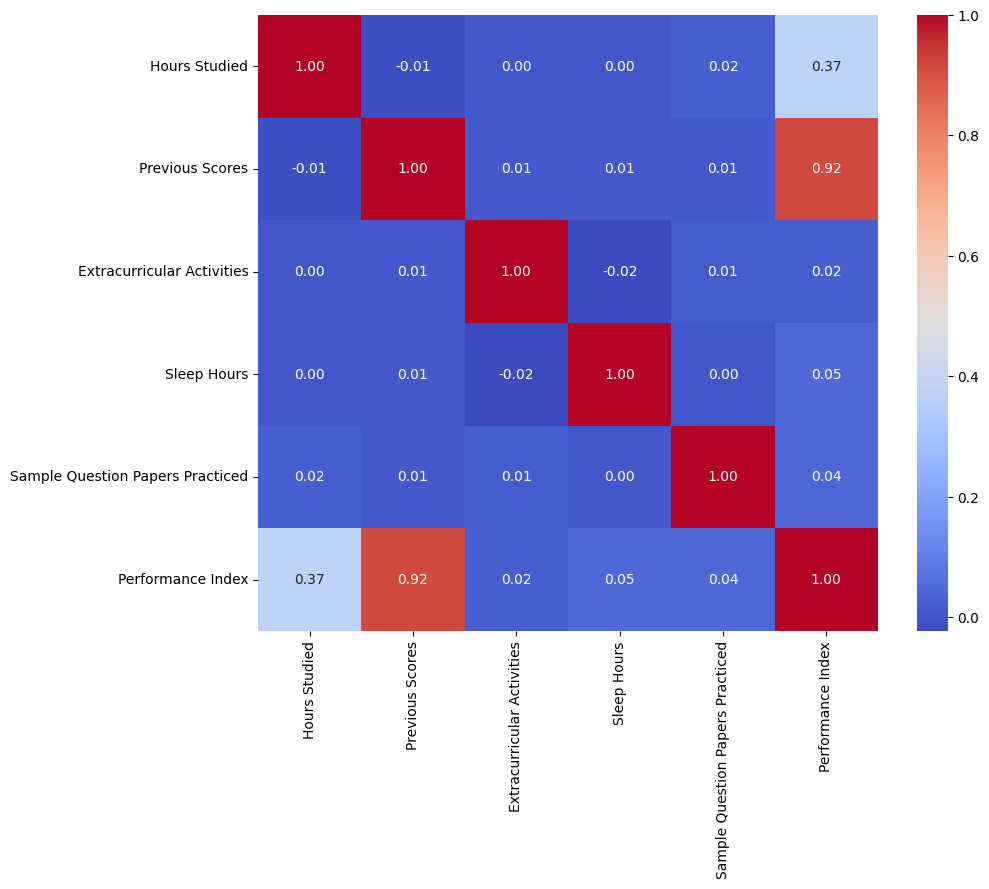

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

Замена отсутсвующих значений медианой

In [ ]:
df.fillna(df.median(), inplace=True)

Нормировка числовых признаков

In [ ]:
numeric_features = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced", "Performance Index"]
df[numeric_features] = (df[numeric_features] - df[numeric_features].mean()) / df[numeric_features].std()

Разделение данных на обучающий и тестовый наборы

In [ ]:
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Реализация линейной регресси

In [ ]:
def linear_regression(X, y):
    X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]  # Добавление столбца с единицами (для свободного члена)
    theta = np.linalg.inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T).dot(y)
    return theta

Обучение модели на обучающем наборе

In [ ]:
theta = linear_regression(X_train, y_train)

Предсказание на тестовом наборе

In [ ]:
X_test_with_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred = X_test_with_bias.dot(theta)

Оценка производительности

In [ ]:
r_squared = 1 - ((y_test - y_pred)**2).sum() / ((y_test - y_test.mean())**2).sum()
print(f"Коэффициент детерминации: {r_squared:.4f}")

Коэффициент детерминации: 0.9890


Три варианта моделей:

In [ ]:
theta1 = linear_regression(X_train, y_train)

theta2 = linear_regression(X_train.drop("Extracurricular Activities", axis=1), y_train)

theta3 = linear_regression(X_train[["Hours Studied", "Previous Scores"]], y_train)

Предсказание на тестовом наборе для каждой модели


In [ ]:
X_test_with_bias1 = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred1 = X_test_with_bias1.dot(theta1)

X_test_with_bias2 = np.c_[np.ones((X_test.shape[0], 1)), X_test.drop("Extracurricular Activities", axis=1)]
y_pred2 = X_test_with_bias2.dot(theta2)

X_test_with_bias3 = np.c_[np.ones((X_test.shape[0], 1)), X_test[["Hours Studied", "Previous Scores"]]]
y_pred3 = X_test_with_bias3.dot(theta3)

Оценка производительности для каждой модели

In [ ]:
r_squared1 = 1 - ((y_test - y_pred1)**2).sum() / ((y_test - y_test.mean())**2).sum()
r_squared2 = 1 - ((y_test - y_pred2)**2).sum() / ((y_test - y_test.mean())**2).sum()
r_squared3 = 1 - ((y_test - y_pred3)**2).sum() / ((y_test - y_test.mean())**2).sum()

Вывод результатов

In [ ]:
print(f"Модель 1 (все признаки): {r_squared1:.4f}")
print(f"Модель 2 (без 'Extracurricular Activities'): {r_squared2:.4f}")
print(f"Модель 3 (только 'Hours Studied' и 'Previous Scores'): {r_squared3:.4f}")

Модель 1 (все признаки): 0.9890
Модель 2 (без 'Extracurricular Activities'): 0.9887
Модель 3 (только 'Hours Studied' и 'Previous Scores'): 0.9859
